# A/B Testing - Lab done  by `Eugene Maina`

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = Your null hypothesis
'H_O = The current template is the best at a response rate of 5%(H_0: 0.05)'

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = Your alternative hypothesis
'H_1 = The new template is can increase response rate by atleast 1%(H_1: p > 0.05)'

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [16]:
# Calculate the required sample size
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower, TTestPower

alpha = 0.05
power = 0.8
effect_size = 0.01
beta = 1 - power

power_analysis = TTestPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, alpha = alpha, power = power, alternative = 'larger')
sample_size = np.ceil(sample_size)
print(f'The required sample size is {sample_size}')
print(f'The beta value is {beta}')
print(f'The alpha value is {alpha}')

The required sample size is 61827.0
The beta value is 0.19999999999999996
The alpha value is 0.05


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

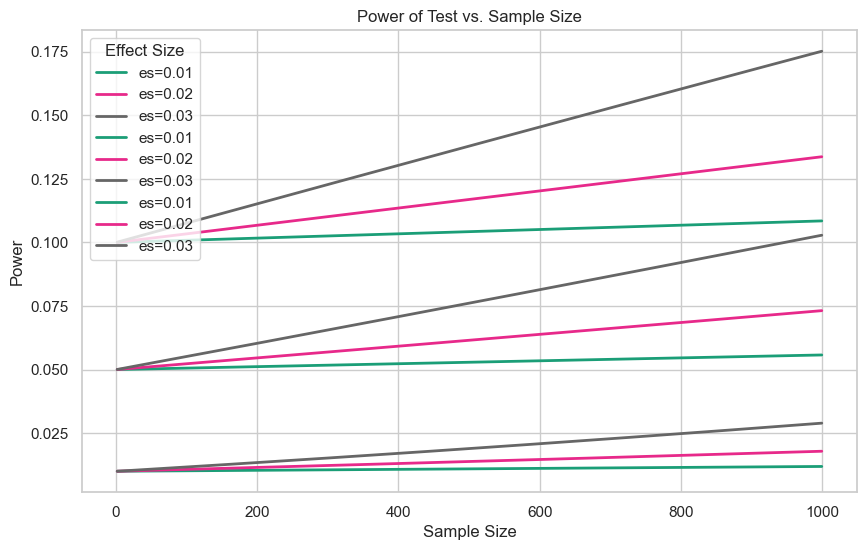

In [11]:
#Your code; plot power curves for the various alpha and effect size combinations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'whitegrid')

effect_sizes = np.array([0.01, 0.02, 0.03])

alpha_values = np.array([0.01, 0.05, 0.1])


plt.figure(figsize = (10, 6))
for alpha in alpha_values:
    power_analysis.plot_power(nobs= np.arange(2, 1000),
                              effect_size=effect_sizes,
                              alpha=alpha,
                              ax=plt.gca(), 
                              )

plt.title('Power of Test vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.legend(title='Effect Size')
plt.show()

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [12]:
print("The experimental design propposed would be to conduct an A/B test where the current template is used as the control group and the new template is used as the experimental group.\n The response rate of the two groups will be compared to determine if the new template is better than the current template.\n The sample size required for the experiment is 1,000 \nThe power of the test is 0.8 and the alpha value is 0.05.\n The effect size is 0.01. The power of the test increases as the sample size increases.\n The power of the test decreases as the effect size decreases.\n The power of the test decreases as the alpha value increases.")

The experimental design propposed would be to conduct an A/B test where the current template is used as the control group and the new template is used as the experimental group.
 The response rate of the two groups will be compared to determine if the new template is better than the current template.
 The sample size required for the experiment is 1,000 
The power of the test is 0.8 and the alpha value is 0.05.
 The effect size is 0.01. The power of the test increases as the sample size increases.
 The power of the test decreases as the effect size decreases.
 The power of the test decreases as the alpha value increases.


## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.